In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Crear un conjunto de datos ficticio
np.random.seed(647)  # Para reproducibilidad

# Supongamos que tienes 1000 usuarios
num_users = 1000

# Características de comportamiento en redes sociales (ficticias)
interacciones = np.random.randint(0, 1000, num_users)
seguidores = np.random.randint(50, 100000, num_users)
tiempo_en_redes = np.random.uniform(0, 10, num_users)

# Etiquetas (ficticias, 0: No compra, 1: Compra)
compra = np.random.choice([0, 1], num_users)

# Crear un DataFrame con los datos
data = pd.DataFrame({
    'Interacciones': interacciones,
    'Seguidores': seguidores,
    'Tiempo_en_redes': tiempo_en_redes,
    'Compra': compra
})

# Dividir el conjunto de datos en entrenamiento y prueba
X = data.drop('Compra', axis=1)
y = data['Compra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=80)

# Crear y entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=500)
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.53


In [42]:
# Mostrar estadísticas descriptivas del conjunto de prueba
print("Estadísticas descriptivas del conjunto de prueba:")
print(X_test.describe())

Estadísticas descriptivas del conjunto de prueba:
       Interacciones    Seguidores  Tiempo_en_redes
count     400.000000    400.000000       400.000000
mean      506.722500  52023.340000         4.939053
std       295.010285  29859.235988         2.893366
min         5.000000    276.000000         0.000072
25%       258.250000  26683.750000         2.393362
50%       490.000000  53931.000000         4.937593
75%       777.000000  79855.500000         7.446173
max       995.000000  99927.000000         9.998502


In [43]:
# Calcular y mostrar otras métricas de evaluación
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisión del modelo: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Puntaje F1: {f1:.4f}")

Precisión del modelo: 0.5275
Sensibilidad (Recall): 1.0000
Puntaje F1: 0.6907


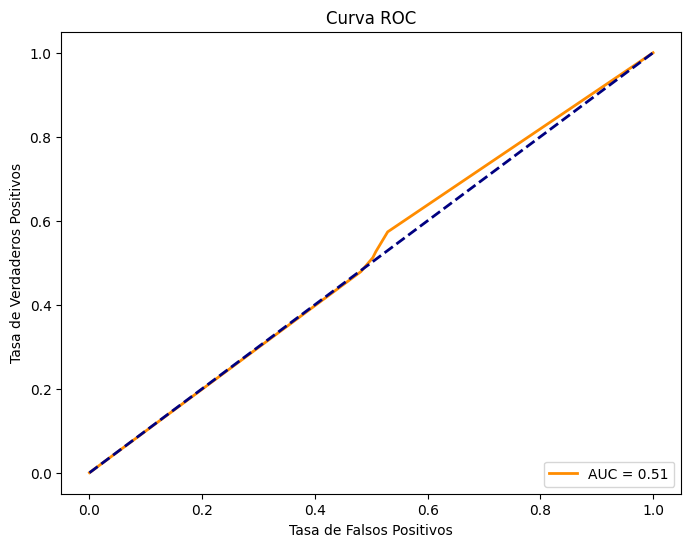

In [44]:
# Calcular la probabilidad de pertenecer a la clase positiva
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Crear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

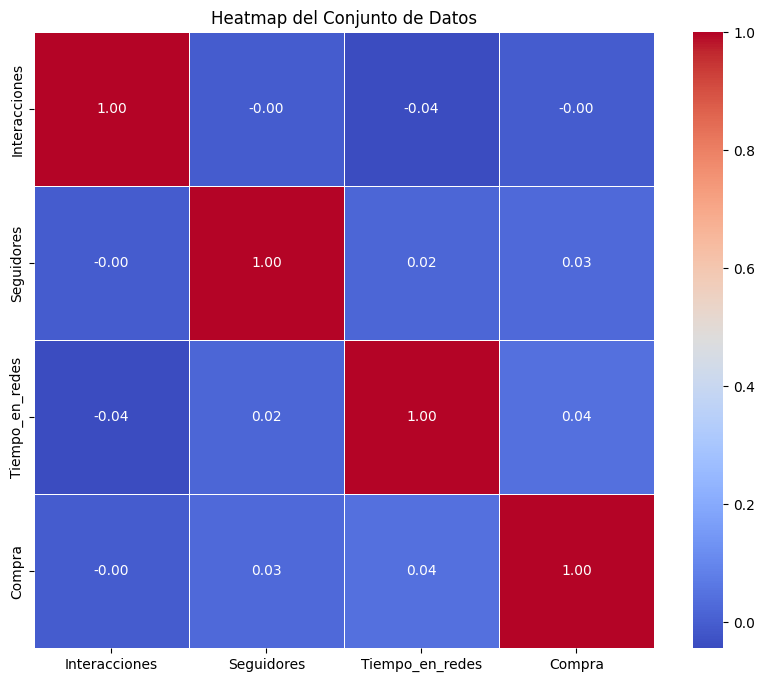

In [45]:
# Crear un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap del Conjunto de Datos')
plt.show()